<a href="https://colab.research.google.com/github/schardon/oda-demo-main/blob/main/Cybersecurity_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from random import random

In [6]:
time_series = [2 * x + random() for x in range(1, 100)]



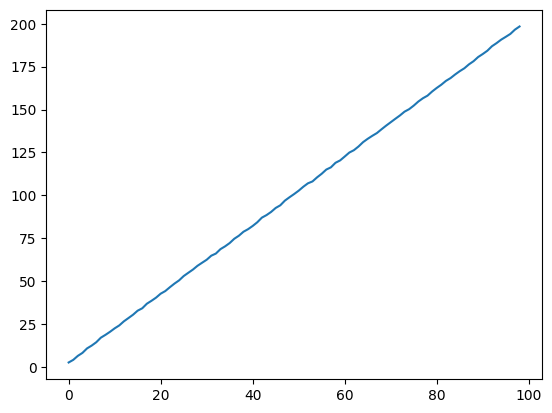

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()


In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order=(0, 1, 2))
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[199.76282762]


In [9]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, lags=2)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[200.48941948]


In [10]:
model_fit.summary

<bound method AutoRegResults.summary of <statsmodels.tsa.ar_model.AutoRegResults object at 0x7f1882dbb820>>